# Clustering des document en relation avec la décennie XXX 

In [84]:
import collections
import os
import string
import sys

from collections import Counter
from wordcloud import WordCloud

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
data_path = "C:/Users/duboi/MA2TAC/tac/data/txt/"

### Choix de la décennie : 1940
### Chargement des textes en relation avec cette décennie

In [24]:
DECADE = '1940'

In [25]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [26]:
# Exemple de fichiers
files[:5]

['KB_JB838_1940-01-04_01-00001.txt',
 'KB_JB838_1940-01-05_01-00009.txt',
 'KB_JB838_1940-01-07_01-00014.txt',
 'KB_JB838_1940-01-10_01-00003.txt',
 'KB_JB838_1940-01-11_01-00004.txt']

In [27]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [28]:
# Exemple de textes
texts[0][:400]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“"

### Véctorisation des documents à l'aide de TF-IDF

In [29]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [ ]:
# Instanciation du modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [31]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\duboi\MA2TAC\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
# Détail de la matrice
tfidf_vectors

<1000x4624 sparse matrix of type '<class 'numpy.float64'>'
	with 937940 stored elements in Compressed Sparse Row format>

In [33]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

gouvernement    0.158569
milieux         0.154846
cabinet         0.133397
neige           0.118083
politiques      0.117647
                  ...   
dépôts          0.000000
désigné         0.000000
désir           0.000000
désirent        0.000000
♦               0.000000
Length: 4624, dtype: float64

### Application d'un algorithme de clustering sur les vecteurs TF-IDF des documents

In [77]:
# Définir le nombre de clusters
N_CLUSTERS = 3

In [78]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [79]:
# Application de clusters
clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

pprint(dict(clustering))

{0: ['KB_JB838_1940-01-07_01-00014.txt',
     'KB_JB838_1940-01-19_01-00005.txt',
     'KB_JB838_1940-02-01_01-00006.txt',
     'KB_JB838_1940-02-06_01-00005.txt',
     'KB_JB838_1940-02-07_01-00005.txt',
     'KB_JB838_1940-02-09_01-00005.txt',
     'KB_JB838_1940-02-12_01-00005.txt',
     'KB_JB838_1940-02-20_01-00007.txt',
     'KB_JB838_1940-03-02_01-00007.txt',
     'KB_JB838_1940-03-04_01-00005.txt',
     'KB_JB838_1940-03-10_01-00008.txt',
     'KB_JB838_1940-03-10_01-00010.txt',
     'KB_JB838_1940-04-03_01-00007.txt',
     'KB_JB838_1940-04-07_01-00008.txt',
     'KB_JB838_1940-04-16_01-00008.txt',
     'KB_JB838_1940-04-22_01-00005.txt',
     'KB_JB838_1940-06-30_01-00005.txt',
     'KB_JB838_1940-07-21_01-00005.txt',
     'KB_JB838_1940-07-22_01-00006.txt',
     'KB_JB838_1940-07-24_01-00005.txt',
     'KB_JB838_1940-07-31_01-00005.txt',
     'KB_JB838_1940-08-02_01-00004.txt',
     'KB_JB838_1940-08-25_01-00005.txt',
     'KB_JB838_1940-10-08_01-00005.txt',
     'KB_JB838_1

### Visualisation de Clusters

In [80]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

reduced_vectors[:10]

array([[-0.25310492, -0.13882263],
       [ 0.54050035, -0.16163365],
       [ 0.10133723,  0.00777262],
       [-0.30689786, -0.25600629],
       [-0.26425186, -0.11761542],
       [-0.16141644,  0.20790324],
       [-0.29242089, -0.18337613],
       [-0.24032763, -0.12098364],
       [-0.08008111,  0.16191616],
       [ 0.36157402, -0.0704015 ]])

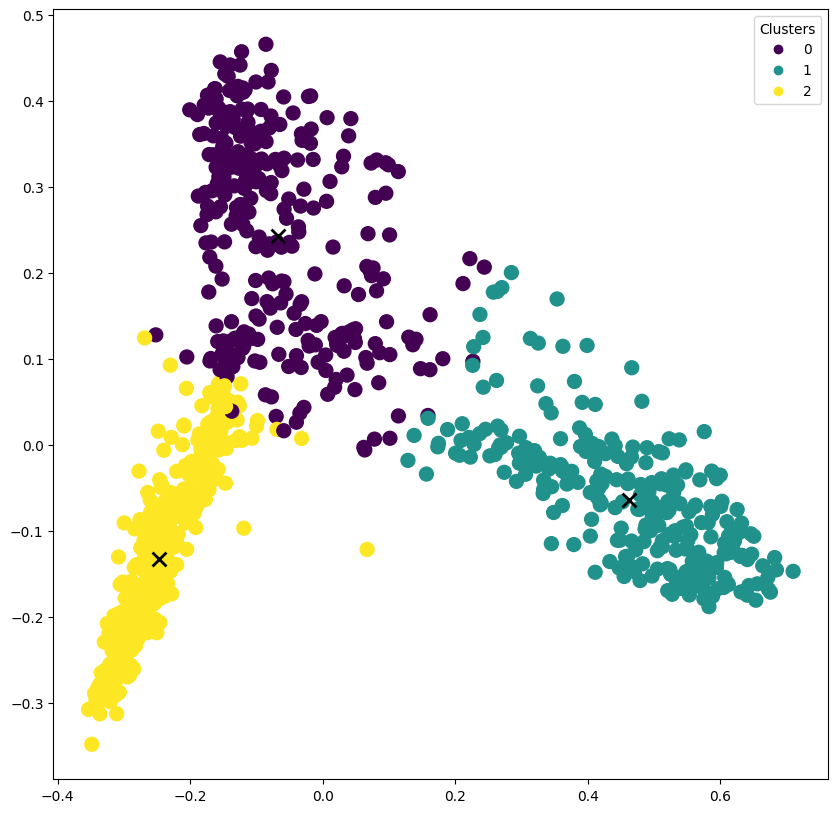

In [81]:
# Génération de plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### Wordclouds pour les clusters

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


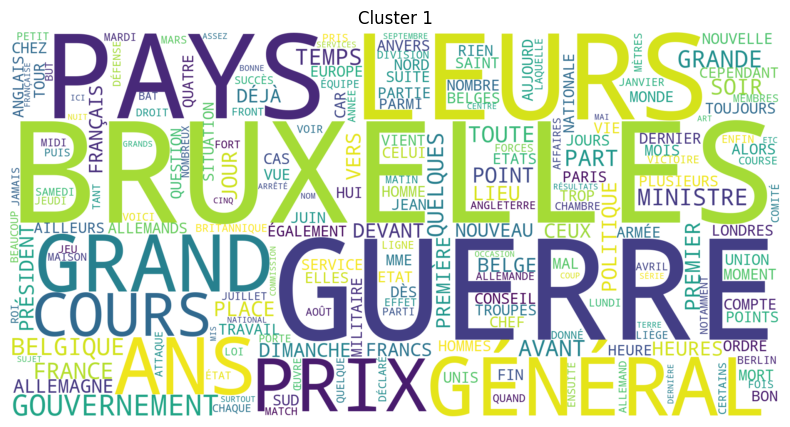

Nuage de mots sauvegardé dans C:/Users/duboi/MA2TAC/tac/data/tmp\cluster_1.png


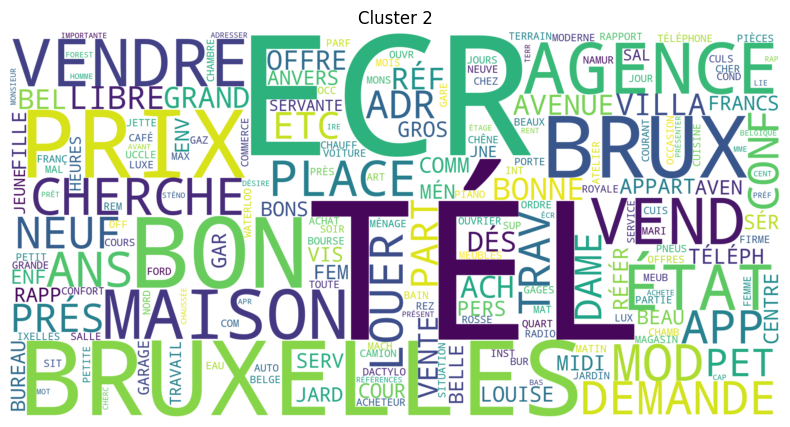

Nuage de mots sauvegardé dans C:/Users/duboi/MA2TAC/tac/data/tmp\cluster_2.png


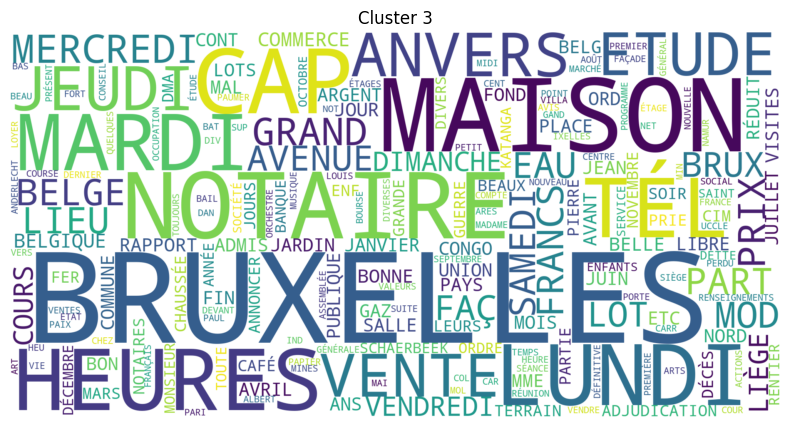

Nuage de mots sauvegardé dans C:/Users/duboi/MA2TAC/tac/data/tmp\cluster_3.png


In [ ]:
# Télécharger les stopwords français
nltk.download('stopwords')

# Charger les stopwords 
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "peu", "rue", "écrire", "ecrire"]
sw = set(sw)

# Dossier contenant les fichiers
data_path = "C:/Users/duboi/MA2TAC/tac/data/txt"
DECADE = '1940'

# Lister les fichiers relatifs à la décennie
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(os.path.join(data_path, f), "r", encoding="utf-8").read() for f in files]

# Fonction de nettoyage
def clean_text(text):
    """Nettoyer un texte en supprimant les stopwords, mots courts et autres éléments inutiles."""
    words = nltk.wordpunct_tokenize(text.lower())
    cleaned = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w not in sw]
    return " ".join(cleaned)

# Nettoyage
cleaned_texts = [clean_text(text) for text in texts]

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorisation 
vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.1)
tfidf_vectors = vectorizer.fit_transform(cleaned_texts)

# clustering
N_CLUSTERS = 3
km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = km_model.fit_predict(tfidf_vectors)

# Regroupement des textes en cluster défiis
clustering = collections.defaultdict(list)
for idx, label in enumerate(clusters):
    clustering[label].append(cleaned_texts[idx])

# Faire un nuage de mots par cluster
output_path = "C:/Users/duboi/MA2TAC/tac/data/tmp"
if not os.path.exists(output_path):
    os.makedirs(output_path)

for cluster_idx, texts in clustering.items():
    cluster_text = " ".join(texts)  
    word_freq = Counter(cluster_text.split()) 
    
    cloud = WordCloud(
        width=2000,
        height=1000,
        background_color='white'
    ).generate_from_frequencies(word_freq)
    
    # Sauver le nuage de mots
    output_file = os.path.join(output_path, f"cluster_{cluster_idx + 1}.png")
    cloud.to_file(output_file)
    
    # Nuages de mots!
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster_idx + 1}")
    plt.show()
    print(f"Nuage de mots sauvegardé dans {output_file}")


# Modèle word2vec

In [85]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

### Chargement et traitement des phrases de corpus

In [88]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

infile = f"C:/Users/duboi/MA2TAC/tac/data/sents.txt"
sentences = MySentences(infile)

#### Bigrammes

In [89]:
bigram_phrases = Phrases(sentences)

In [90]:
type(bigram_phrases.vocab)

dict

In [91]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

#### Trigrammes

In [92]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [93]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

#### Création corpus

In [94]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])
print(corpus[:100])

[['mi', 'imnri', 'r', 'i', '<<', 'i', 'i', 'hmu', "'", 'i', '/', 'tx', "-'", 'l', ':', 'marche', 'tenu', 'hors', 'villa', ',', 'la', '9', '.'], ['--', 'u', 'a', 'ete', 'vaain', 'si', 'teicj', '>>', 'm', 'races_indigenes', 'de', 'fr', '.'], ['31', '<)', 'a', '5s', "'", 'k', '131', 'de', '.'], ['rasa', 'iichakdui', "'", 'te', ',', 'do', '(', 'r', '.', '3s0', 'h', '710', '.', 'taureaux', 'iallsenas', ',>', 'ia', 'u', '\\', '--', 'a', '--', ';', '0ii', '.'], ['hollandais', ',', 'dufr', '.'], ['0', '.'], ['--', 'a', '9', '.--', 'la', 'idto', '-', 'vachei', 'laitieres', ':', 'bn', 'vante', '1q', '.'], ['vendues', '3', '\\', 'au', 'prix', 'la', '410', 'a', '*', '<<', 'i', 'h', '\\;', 'genisses', ',', 'kl', '.'], ["'.", '9', '.'], ['i', 'l', '.', '2', 'i', '.', 'id', '.'], ['da', '370', 'i', '6lutr', '.'], ['marche', 'a', '<', 'u', 'porcs', '.'], ['--', 'categorie', 'de', 'lt', 'ilashtya', ':', "'", '237', 'on', 'vente', ';', 'vendus', '1', 'm', '.', 'do', "'", '2', 'i', '.--', 'a', ';:,', 'l'

#### Entrainement d'un modèle Word2Vec sur ce corpus

In [ ]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 12min 30s
Wall time: 13h 5min 42s


In [ ]:
outfile = f"C:/Users/duboi/MA2TAC/tac/data/newspapers.model" 
model.save(outfile)

In [99]:
model = Word2Vec.load("C:/Users/duboi/MA2TAC/tac/data/newspapers.model")

#### Exploration du modèle 

In [129]:
model.wv.similarity("sport", "match")

0.725734

In [123]:
model.wv.similarity("guerre", "allemagne")

0.61812735

In [125]:
model.wv.similarity("guerre", "senegal")

0.33447844

In [126]:
model.wv.similarity("guerre", "belgique")

0.5949606

In [107]:
model.wv.most_similar("general", topn=10)

[('generai', 0.8883053064346313),
 ('haut_commissaire', 0.8771421313285828),
 ('gouverneur_general', 0.8743455410003662),
 ('soudan', 0.8697999715805054),
 ('parti_communiste', 0.860090434551239),
 ('conseiller', 0.8409311771392822),
 ('marechal_petain', 0.8390694260597229),
 ('chancelier', 0.8333510160446167),
 ('prefet', 0.833005964756012),
 ('commandant_supreme', 0.8315569758415222)]

In [122]:
model.wv.most_similar("guerre", topn=10)

[('liberation', 0.8941409587860107),
 ('guerro', 0.8822083473205566),
 ('population', 0.858765184879303),
 ('derniere_guerre', 0.857219398021698),
 ('guorre', 0.849206268787384),
 ('guerre_mondiale', 0.847641110420227),
 ('guorro', 0.8470267057418823),
 ('separation', 0.831458568572998),
 ('colonie', 0.8224800825119019),
 ('wehrmacht', 0.8200019598007202)]

In [119]:
model.wv.most_similar("femme", topn=10)

[('femmo', 0.9100270867347717),
 ('jeune_fille', 0.9071845412254333),
 ('jeune_femme', 0.8986706137657166),
 ('nourrice', 0.8777093291282654),
 ('fille', 0.8427734375),
 ('mariee', 0.8397805690765381),
 ('fillette', 0.8263046741485596),
 ('petite_fille', 0.8192596435546875),
 ('jeune_veuve', 0.8108609914779663),
 ('menagere', 0.797268807888031)]

In [120]:
model.wv.most_similar("homme", topn=10)

[('hommo', 0.9230861067771912),
 ('adolescent', 0.8769708871841431),
 ('enfant', 0.8650078177452087),
 ('ivrogne', 0.8302615880966187),
 ('entant', 0.8220893144607544),
 ('serviteur', 0.8191685676574707),
 ('animal', 0.8095319271087646),
 ('aventurier', 0.8046966195106506),
 ('aveugle', 0.8034762144088745),
 ('honnete_homme', 0.7996137142181396)]

In [112]:
print(model.wv.most_similar(positive=['londres', 'berlin'], negative=['france']))

[('stockholm', 0.7943101525306702), ('teheran', 0.7914919257164001), ('washington', 0.7908509373664856), ('athenes', 0.7889717817306519), ('alger', 0.7820504307746887), ('geneve', 0.7818482518196106), ('moscou', 0.7695821523666382), ('tokio', 0.7693785429000854), ('lisbonne', 0.7688769698143005), ('berne', 0.7660098671913147)]
